In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import numpy as np
from sklearn.svm import SVC
import pickle 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score,precision_score
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
separator = os.path.sep
path_act = os.path.dirname(os.path.abspath("__file__"))
dir = separator.join(path_act.split(separator)[:-1])

In [26]:
df = pd.read_csv(f"{dir}/dataset.csv")
df

,0.3805038034915924,0.6406300663948059,-3.308969098725356e-07,0.4309062659740448,0.6319090127944946,-0.019521795213222504,0.4849782884120941,0.5604094862937927,-0.027627794072031975,0.5137690305709839,...,0.4046844244003296,0.4374014139175415,-0.05328986421227455,0.4004516303539276,0.5001010298728943,-0.046255793422460556,0.38835400342941284,0.4933748245239258,-0.03629148378968239,pausa
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,pausa
1,0.389108,0.645334,-3.703056e-07,0.437233,0.639978,-0.020128,0.486931,0.569994,-0.029193,0.504806,...,0.410942,0.447174,-0.056097,0.405504,0.509341,-0.049799,0.393409,0.498795,-0.040541,pausa
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,pausa
3,0.383272,0.673303,-2.331599e-07,0.430396,0.671331,-0.031433,0.484434,0.613281,-0.045517,0.501194,...,0.381119,0.458455,-0.046998,0.381823,0.521865,-0.042641,0.378465,0.520425,-0.034507,pausa
4,0.356643,0.649174,-4.138614e-07,0.414483,0.644081,-0.019512,0.471892,0.571988,-0.027685,0.502775,...,0.389468,0.438790,-0.058354,0.388439,0.504586,-0.050051,0.378175,0.501851,-0.039543,pausa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.261603,0.721177,5.468210e-08,0.260251,0.593229,-0.005285,0.278994,0.482203,-0.026895,0.274647,...,0.420189,0.729517,-0.052298,0.398893,0.744089,-0.033853,0.377481,0.744593,-0.021246,siguiente
295,0.279059,0.729726,-1.634361e-08,0.277109,0.602820,-0.003619,0.298819,0.489753,-0.021557,0.301090,...,0.433769,0.749043,-0.046378,0.411729,0.762338,-0.029984,0.391438,0.761360,-0.018737,siguiente
296,0.259760,0.715430,9.012999e-08,0.256811,0.589288,-0.005895,0.275660,0.478211,-0.027108,0.272579,...,0.418151,0.726932,-0.053241,0.396962,0.743370,-0.035461,0.375817,0.743513,-0.022958,siguiente
297,0.262724,0.719062,3.644493e-08,0.260509,0.592058,-0.005982,0.279104,0.479777,-0.027091,0.276107,...,0.420502,0.728189,-0.053521,0.398826,0.742271,-0.035581,0.376960,0.742161,-0.023092,siguiente


In [27]:
df.columns = [x for x in range(df.shape[1])]
df = df.rename(columns={63:"resultado"})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,resultado
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,pausa
1,0.389108,0.645334,-3.703056e-07,0.437233,0.639978,-0.020128,0.486931,0.569994,-0.029193,0.504806,...,0.410942,0.447174,-0.056097,0.405504,0.509341,-0.049799,0.393409,0.498795,-0.040541,pausa
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,pausa
3,0.383272,0.673303,-2.331599e-07,0.430396,0.671331,-0.031433,0.484434,0.613281,-0.045517,0.501194,...,0.381119,0.458455,-0.046998,0.381823,0.521865,-0.042641,0.378465,0.520425,-0.034507,pausa
4,0.356643,0.649174,-4.138614e-07,0.414483,0.644081,-0.019512,0.471892,0.571988,-0.027685,0.502775,...,0.389468,0.438790,-0.058354,0.388439,0.504586,-0.050051,0.378175,0.501851,-0.039543,pausa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.261603,0.721177,5.468210e-08,0.260251,0.593229,-0.005285,0.278994,0.482203,-0.026895,0.274647,...,0.420189,0.729517,-0.052298,0.398893,0.744089,-0.033853,0.377481,0.744593,-0.021246,siguiente
295,0.279059,0.729726,-1.634361e-08,0.277109,0.602820,-0.003619,0.298819,0.489753,-0.021557,0.301090,...,0.433769,0.749043,-0.046378,0.411729,0.762338,-0.029984,0.391438,0.761360,-0.018737,siguiente
296,0.259760,0.715430,9.012999e-08,0.256811,0.589288,-0.005895,0.275660,0.478211,-0.027108,0.272579,...,0.418151,0.726932,-0.053241,0.396962,0.743370,-0.035461,0.375817,0.743513,-0.022958,siguiente
297,0.262724,0.719062,3.644493e-08,0.260509,0.592058,-0.005982,0.279104,0.479777,-0.027091,0.276107,...,0.420502,0.728189,-0.053521,0.398826,0.742271,-0.035581,0.376960,0.742161,-0.023092,siguiente


In [28]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]



In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y)


In [30]:
print (X_train,y_train)


           0         1             2         3         4         5         6   \
75   0.383232  0.667858 -3.112542e-07  0.427478  0.667994 -0.030036  0.483941   
190  0.360161  0.811056  4.870314e-07  0.417264  0.783133 -0.033084  0.468809   
106  0.350296  0.835202  6.660483e-07  0.411425  0.808804 -0.041283  0.465658   
224  0.267573  0.719583  4.769949e-08  0.264131  0.593251 -0.007764  0.282197   
126  0.371357  0.828199  4.091965e-07  0.427273  0.808719 -0.031515  0.475034   
..        ...       ...           ...       ...       ...       ...       ...   
268  0.279435  0.729079 -8.730020e-09  0.277331  0.601846 -0.003267  0.299070   
202  0.265107  0.712251  1.201216e-07  0.257918  0.588749 -0.008865  0.273856   
155  0.365396  0.826456  4.522896e-07  0.421112  0.804534 -0.032538  0.470127   
39   0.364766  0.667740 -3.478435e-07  0.414085  0.663891 -0.022716  0.467608   
212  0.281598  0.721821 -2.111040e-08  0.277059  0.595921 -0.005898  0.297017   

           7         8     

In [31]:
print (X_test,y_test)

           0         1             2         3         4         5         6   \
242  0.260705  0.718287  8.377826e-08  0.257006  0.593806 -0.006713  0.275346   
128  0.366246  0.828518  4.318211e-07  0.422731  0.806832 -0.032715  0.470812   
24   0.370555  0.661622 -2.803072e-07  0.416712  0.652799 -0.020462  0.469328   
290  0.260573  0.718556  5.850158e-08  0.257388  0.590897 -0.005151  0.275861   
65   0.000000  0.000000  0.000000e+00  0.000000  0.000000  0.000000  0.000000   
..        ...       ...           ...       ...       ...       ...       ...   
154  0.345975  0.831980  6.185359e-07  0.407913  0.804051 -0.039408  0.462500   
175  0.362327  0.812133  4.926302e-07  0.420255  0.785113 -0.032533  0.470934   
221  0.266517  0.716679  8.046618e-08  0.261360  0.592177 -0.009198  0.278506   
263  0.261287  0.717732  7.378917e-08  0.257411  0.591601 -0.006270  0.275627   
138  0.358123  0.807217  5.277645e-07  0.416385  0.780339 -0.033874  0.468792   

           7         8     

In [32]:
#primer_modelo Super Vector Machine

primer_modelo = SVC()

primer_modelo.fit(X_train, y_train)


SVC()

In [33]:
#predicciones

predicciones = primer_modelo.predict (X_test)
predicciones

array(['siguiente', 'play', 'pausa', 'siguiente', 'pausa', 'siguiente',
       'play', 'play', 'siguiente', 'siguiente', 'play', 'play', 'play',
       'siguiente', 'siguiente', 'siguiente', 'pausa', 'siguiente',
       'pausa', 'siguiente', 'siguiente', 'siguiente', 'siguiente',
       'siguiente', 'play', 'play', 'play', 'play', 'pausa', 'pausa',
       'play', 'play', 'siguiente', 'pausa', 'siguiente', 'pausa',
       'siguiente', 'play', 'siguiente', 'pausa', 'play', 'play', 'pausa',
       'siguiente', 'play', 'pausa', 'pausa', 'siguiente', 'siguiente',
       'play', 'pausa', 'play', 'siguiente', 'play', 'pausa', 'siguiente',
       'siguiente', 'play', 'pausa', 'play', 'play', 'pausa', 'play',
       'siguiente', 'siguiente', 'pausa', 'siguiente', 'play',
       'siguiente', 'siguiente', 'play', 'play', 'siguiente', 'siguiente',
       'play'], dtype=object)

In [34]:
print (list(y_test))


['siguiente', 'play', 'pausa', 'siguiente', 'pausa', 'siguiente', 'play', 'play', 'siguiente', 'siguiente', 'play', 'play', 'play', 'siguiente', 'siguiente', 'siguiente', 'pausa', 'siguiente', 'pausa', 'siguiente', 'siguiente', 'siguiente', 'siguiente', 'siguiente', 'play', 'play', 'play', 'play', 'pausa', 'pausa', 'play', 'play', 'siguiente', 'pausa', 'siguiente', 'pausa', 'siguiente', 'play', 'siguiente', 'pausa', 'play', 'play', 'pausa', 'siguiente', 'play', 'pausa', 'pausa', 'siguiente', 'siguiente', 'play', 'pausa', 'play', 'siguiente', 'play', 'pausa', 'siguiente', 'siguiente', 'play', 'pausa', 'play', 'play', 'pausa', 'play', 'siguiente', 'siguiente', 'pausa', 'siguiente', 'play', 'siguiente', 'siguiente', 'play', 'play', 'siguiente', 'siguiente', 'play']


In [35]:
#comprobar que estaba bien utilizando 

np.array (predicciones== y_test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

<AxesSubplot: title={'center': 'Matriz de Confusion'}>

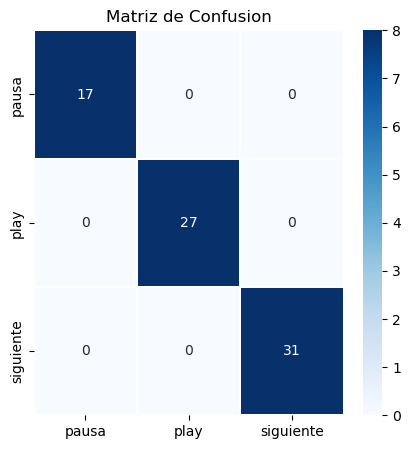

In [36]:
#matriz de confusion

etiquetas = ("pausa","play","siguiente")
matriz_confusion = confusion_matrix(y_test, predicciones)
fig, ax = plt.subplots(figsize=(5, 5))

ax.set_title("Matriz de Confusion")

maping = sns.heatmap(matriz_confusion, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=etiquetas,
                     yticklabels=etiquetas, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [37]:
with open(f'{dir}/modelo/modelo.pkl','wb') as fw:
    pickle.dump(primer_modelo,fw) #guardar el modelo